In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [90]:
weather_data = pd.read_csv("G:\Business Analytics\Forecast Temperature\DailyTemperature.csv")
weather_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [91]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [92]:
weather_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [93]:
weather_data['date'] = pd.to_datetime(weather_data['date'],format='%Y-%m-%d')

In [94]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [95]:
mean_temp = px.line(data_frame=weather_data, x=weather_data['date'], y=weather_data['meantemp'],title='Mean Temperature Over the Years')
mean_temp.show()

In [96]:
humidity = px.line(data_frame=weather_data, x=weather_data['date'], y=weather_data['humidity'],title='Humidity Over the Years')
humidity.show()

In [97]:
wind_speed = px.line(data_frame=weather_data, x=weather_data['date'], y=weather_data['wind_speed'],title='Wind-Speed Over the Years')
wind_speed.show()

In [98]:
scatter = px.scatter(data_frame=weather_data , x = weather_data['humidity'] , y = weather_data['meantemp'] ,
                     size = weather_data['meantemp'] , trendline="ols", trendline_color_override='red',
                     title='Relationship between Temperature & Humidity')
scatter.show()

#ols ordinary least squar eregression

In [99]:
# Adding Columns

weather_data['Year'] = weather_data['date'].dt.year
weather_data['Month'] = weather_data['date'].dt.month

weather_data.head()

,date,meantemp,humidity,wind_speed,meanpressure,Year,Month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


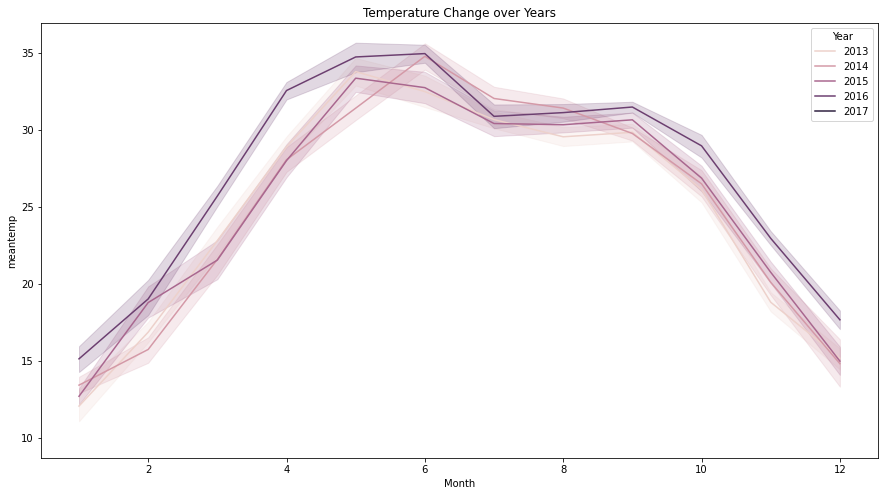

In [100]:
# Temperature Change
plt.figure(figsize=(15,8))
sns.lineplot(data=weather_data , x = weather_data['Month'] , y = weather_data['meantemp'] , hue = weather_data['Year'])
plt.title('Temperature Change over Years')
plt.show()

#### Forecasting for Next Year

In [101]:
pip install prophet

In [102]:
forecast_data = weather_data.rename(columns={'date':'ds' , 'meantemp':'y'})
forecast_data.head()

,ds,y,humidity,wind_speed,meanpressure,Year,Month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [103]:
import prophet

In [104]:
from prophet import Prophet
from prophet.plot import plot_plotly , plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model,predictions)

18:05:24 - cmdstanpy - INFO - Chain [1] start processing
18:05:26 - cmdstanpy - INFO - Chain [1] done processing
